<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#T2-CPMG-Measurements" data-toc-modified-id="T2-CPMG-Measurements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>T2 CPMG Measurements</a></span></li><li><span><a href="#T2-Spin-Echo" data-toc-modified-id="T2-Spin-Echo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>T2 Spin Echo</a></span></li><li><span><a href="#Other-T2-Measurements" data-toc-modified-id="Other-T2-Measurements-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other T2 Measurements</a></span></li><li><span><a href="#T1-Measurements" data-toc-modified-id="T1-Measurements-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>T1 Measurements</a></span></li></ul></div>

In [519]:
%matplotlib inline

import re
import sys
import os
#sys.path.insert(0, '../..')
#os.chdir('../../../')

#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams.update({'font.size': 22})

import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.8)  
sns.set_style('whitegrid', {'font.family':'helvetica', 'font.serif':'Times New Roman'})
sns.set_palette("RdBu",6)

In [520]:
DIR = "week3/"

# Helper Functions

In [521]:
DELTA = 5 # 5 points around peak to look for

class fid:
    
    def __init__(self, DIR, filename, TE=6.01*2, num_pulses=10, thresh=2.5):
        self.DIR = DIR
        self.filename = filename
        
        with open(DIR+filename, 'r') as f:
            data = f.readlines()
            data = np.array([line.strip().split('\t') for line in data])
            data = data[1:,:].astype(np.float64)
            data[data > thresh] = 0
            
        self.data = data
        
        self.time = data[:,0]
        self.FID = data[:,2]
        
        self.time_step = self.time[1]-self.time[0]
        self.TE = TE/1000 # Units in seconds, input in ms
        self.i_t0 = int(abs(self.time[0])/self.time_step)
        self.i_t = int(abs(self.TE)/self.time_step)
        self.num_pulses = num_pulses
        
    def find_peaks(self):
        indices = [self.i_t0 + i*self.i_t for i in range(0, self.num_pulses)]
        
        peaks = [max(self.FID[i-DELTA:i+DELTA]) for i in indices]
        peak_inds = [i+np.argmax(self.FID[i-DELTA:i+DELTA]) for i in indices]
        peak_times = np.take(self.time, peak_inds)

        #plt.plot(self.time, self.FID, label="Experimental data", linestyle=":")
        #plt.scatter(peak_times, peaks, label="Peaks")
        return peaks, peak_times
    
    def fit_peaks(self):
        peaks, peak_times = self.find_peaks()
        log_peaks = np.log(peaks)
        
        z = np.polyfit(peak_times, log_peaks, 1)
        p = np.poly1d(z)
        print("T2: " + str(-1000/float(z[0])) + " ms")
        
        plt.scatter(peak_times, log_peaks)
        plt.plot(self.time, p(self.time))

No handles with labels found to put in legend.


T2: 117.3834393560885 ms


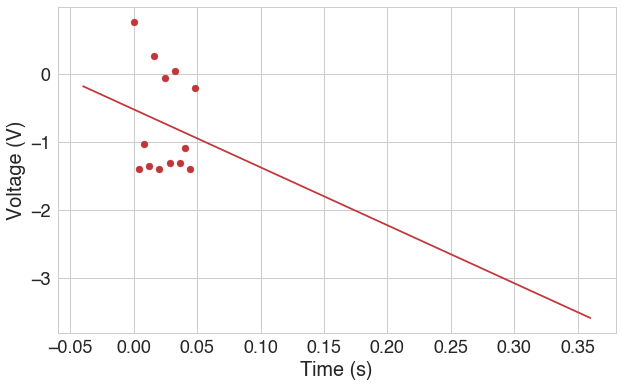

In [522]:
t2_fid = fid(DIR, "glycerol-t2-6.DAT", TE=2.01*2, num_pulses=13)
t2_fid.fit_peaks()
#plt.plot(t2_fid.data[1:5000,0], np.square(t2_fid.data[1:5000,2]), label="Experimental data")
#plt.plot([i for i in range(1,5000)], np.square(t2_fid.data[1:5000,2]), label="Experimental data")

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

# T2 CPMG Measurements

-14.1502258264


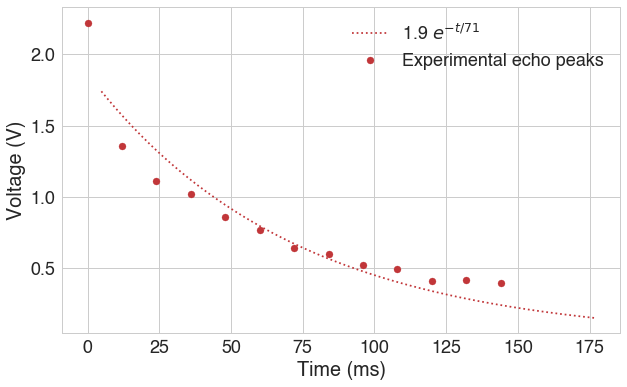

In [523]:

t = np.array([0.012*i for i in range(0, 13)])
x = [2.22,1.361, 1.116, 1.022, 0.86, 0.767, 0.646, 0.604, 0.526, 0.497, 0.412, 0.418, 0.399]
#d = [0.05/12*i for i in range(6,-6, -1)]
#print(len(d))
#x = [x[i] + d[i] for i in range(0,12)]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, "glycerol-t2-1.DAT")
#plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
print(fit[0][1])
plt.scatter(1000*t, x, label="Experimental echo peaks")
plt.plot(1000*t2_fid.data[700:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:5000,0]), label="%.1f $e^{-t/%.f}$" %(fit[0][0], -1000/fit[0][1]), linestyle=":")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.legend()
#plt.title("glycerol-t2-1.DAT")
plt.show()

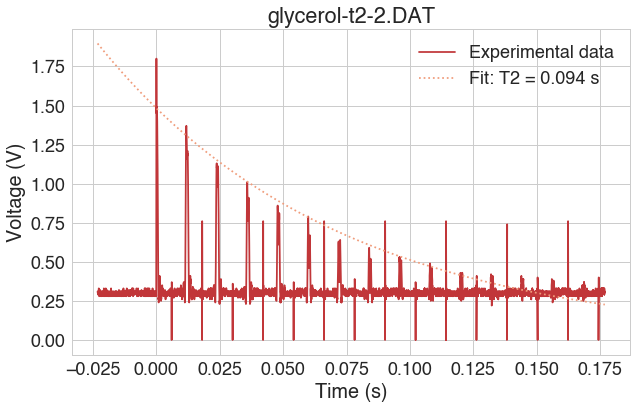

In [524]:

t = [0.012*i for i in range(1, 13)]
x = [1.364, 1.128, 1.004, 0.854, 0.787, 0.638, 0.580, 0.521, 0.476, 0.423, 0.405, 0.392]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, "glycerol-t2-2.DAT")
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title("glycerol-t2-2.DAT")
plt.show()

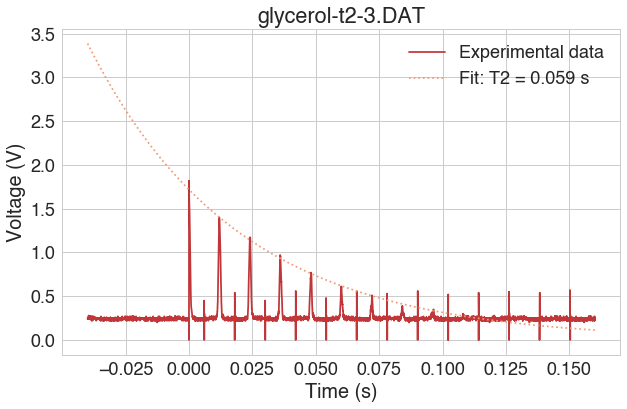

In [525]:

filename = "glycerol-t2-3.DAT"
t = [0.012*i for i in range(1, 11)]
x = [1.385, 1.158, 0.959, 0.757, 0.6, 0.499, 0.37, 0.333, 0.3, 0.25]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=2)
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

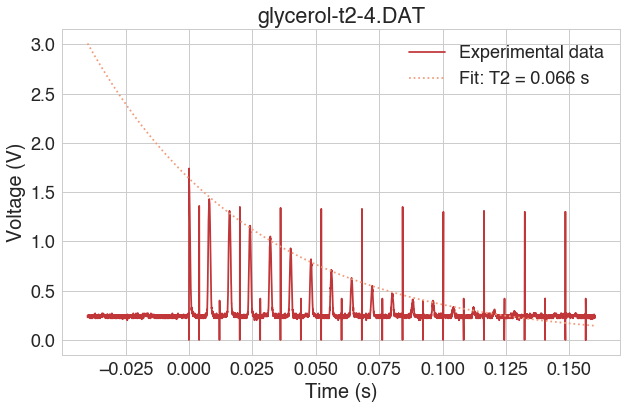

In [526]:

filename = "glycerol-t2-4.DAT"
t = [0.00801*i for i in range(1, 14)]
x = [1.419, 1.297, 1.136, 1.029, 0.917, 0.813, 0.701, 0.621, 0.533,0.467, 0.4, 0.394, 0.326]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=2)
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

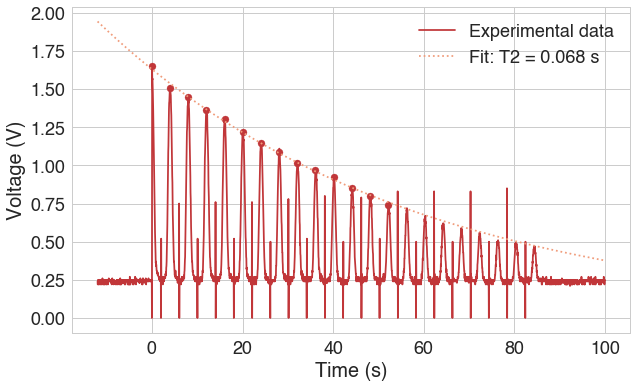

In [527]:

filename = "glycerol-t2-5.DAT"
t = [0.00401*i for i in range(0, 14)]
x = [1.65,1.505, 1.446, 1.362, 1.302, 1.219, 1.148, 1.089, 1.016, 0.969, 0.921, 0.849, 0.801, 0.742]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=1.9)
plt.plot(1000*t2_fid.data[700:3500,0], t2_fid.data[700:3500,2], label="Experimental data")
plt.scatter(1000*np.array(t), x)
plt.plot(1000*t2_fid.data[700:3500,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:3500,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.savefig("week3/glycerol-t2-5.png")
plt.show()

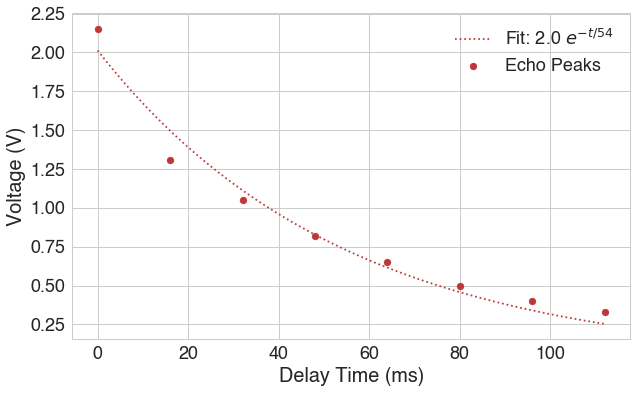

In [528]:

filename = "glycerol-t2-6.DAT"
t = [0.01601*i for i in range(0, 8)]
x = [2.15, 1.31, 1.05, 0.82, 0.650, 0.5, 0.40, 0.33]

t2_fid = fid(DIR, filename, thresh=3)
#plt.plot(1000*t2_fid.data[700:5500,0], t2_fid.data[700:5500,2], label="Experimental data")
plt.scatter(1000*np.array(t), x, label="Echo Peaks")

time = np.linspace(0, 0.01601*7, 80)
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
plt.plot(1000*time, fit[0][0]*np.exp(fit[0][1]*time), label="Fit: %.1f $e^{-t/%.f}$" %(fit[0][0], -1000/fit[0][1]), linestyle=":")

plt.xlabel("Delay Time (ms)")
plt.ylabel("Voltage (V)")
plt.legend()
#plt.title(filename)
plt.savefig("week3/glycerol-t2-6.png")
plt.show()

62.5255518645
[0.0, 0.01601, 0.03202, 0.04803, 0.06404, 0.08005, 0.09606, 0.11207]


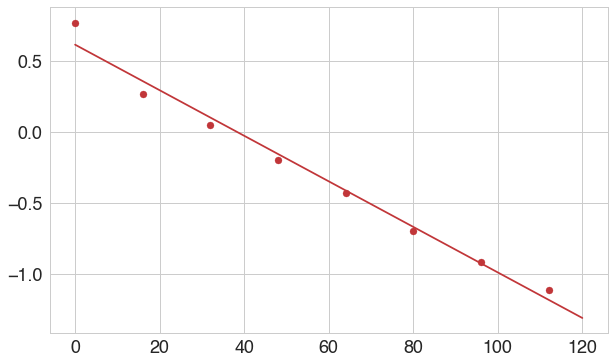

In [529]:
log_peaks = np.log(x)

z = np.polyfit(t, log_peaks, 1)
p = np.poly1d(z)
print(-1000/z[0])
print(t)
plt.scatter(1000*np.array(t), log_peaks)
plt.plot(1000*np.linspace(0,0.12, 100), p(np.linspace(0,0.12, 100)))

# Other T2 Measurements

In [530]:
files = [
    "glycerol-t2-8.DAT", 
    "glycerol-t2-9.DAT",
    "glycerol-t2-10.DAT",
    "glycerol-t2-11.DAT",
    "glycerol-t2-13.DAT",
    "glycerol-t2-14.DAT",
    "glycerol-t2-15.DAT"
]

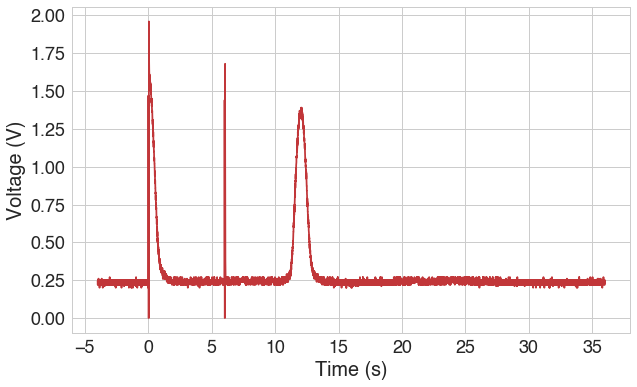

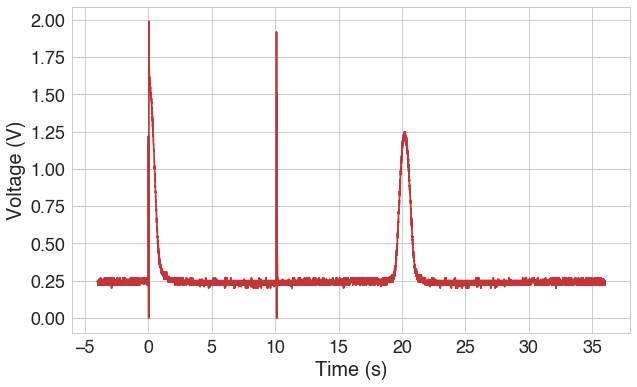

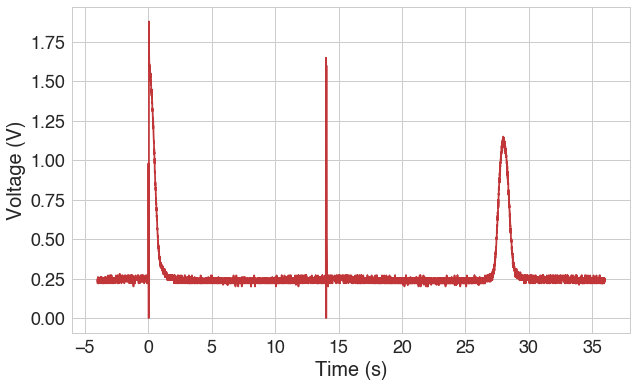

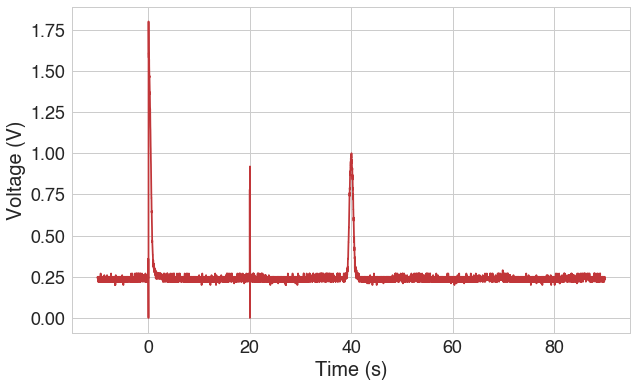

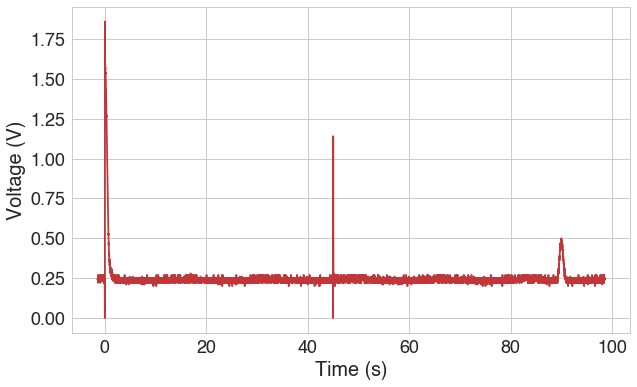

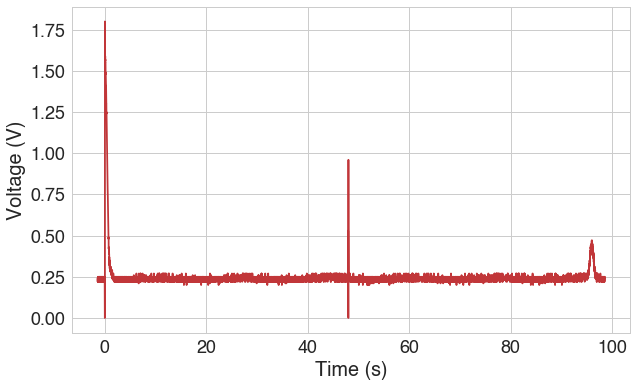

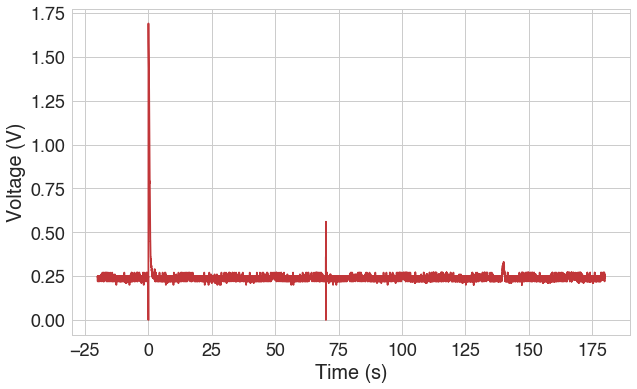

In [531]:
#%matplotlib inline
for filename in files:
    t2_fid = fid(DIR, filename, thresh=2)
    plt.plot(1000*t2_fid.data[:,0], t2_fid.data[:,2], label=filename)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.savefig("week3/"+filename.replace("DAT", "png"))
    plt.show()

array([  12.02,   26.24,   40.46,   54.68,   68.9 ,   83.12,   97.34,
        111.56,  125.78,  140.  ])

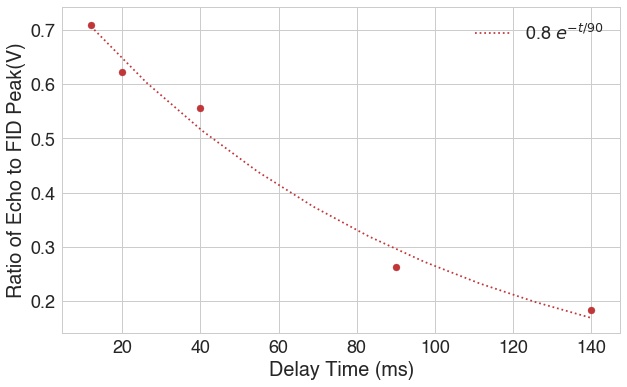

In [532]:

dt = np.array([0.01202, 0.02002, 0.04  , 0.09, 0.14])
dx = np.array([0.7092 , 0.6231 , 0.5556, 0.2634, 0.1834])

time = np.linspace(0.01202, 0.14, 10)
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), dt, dx)
plt.plot(1000*time, fit[0][0]*np.exp(fit[0][1]*time), label="%.1f $e^{-t/%.f} $" %(fit[0][0], -1000/fit[0][1]), linestyle=":")

plt.scatter(1000*dt, dx )
plt.xlabel("Delay Time (ms)")
plt.ylabel("Ratio of Echo to FID Peak(V)")
plt.legend()
1000*time

# T1 Measurements

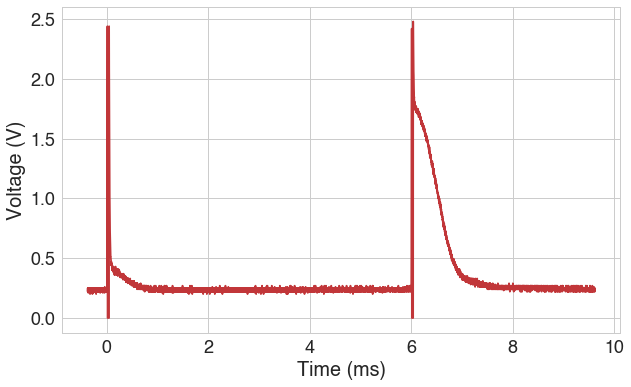

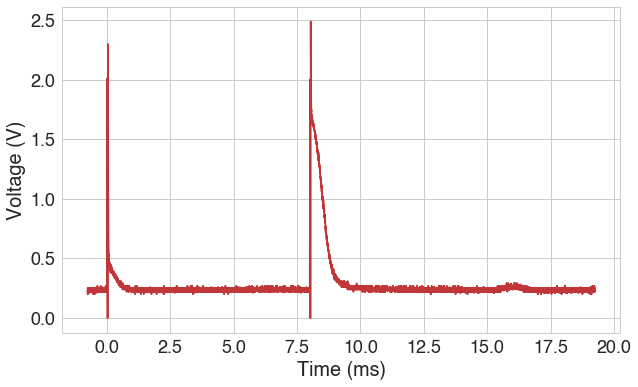

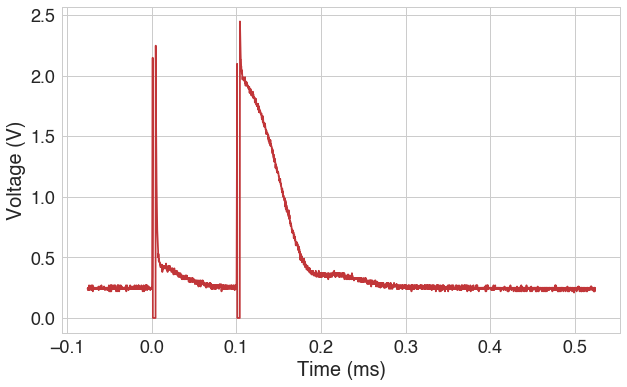

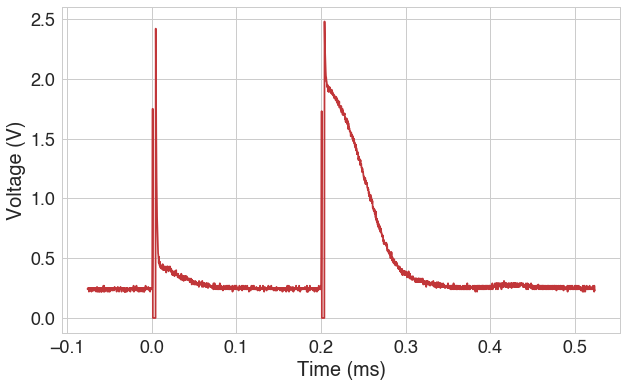

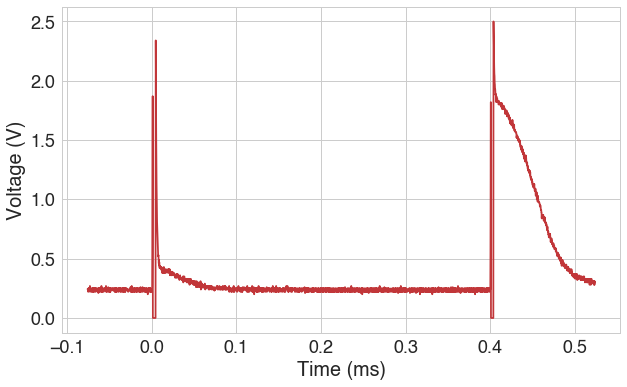

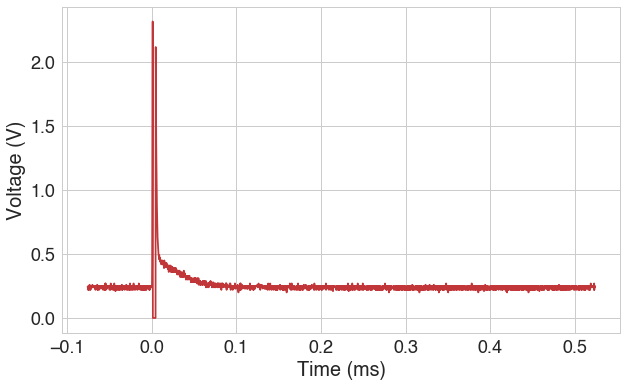

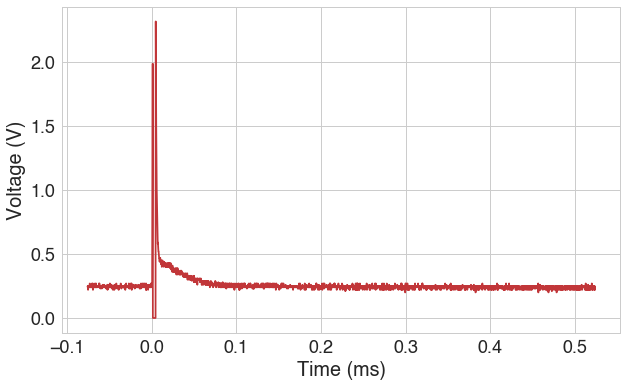

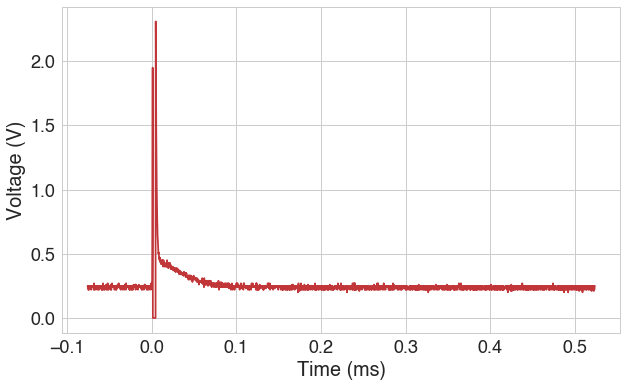

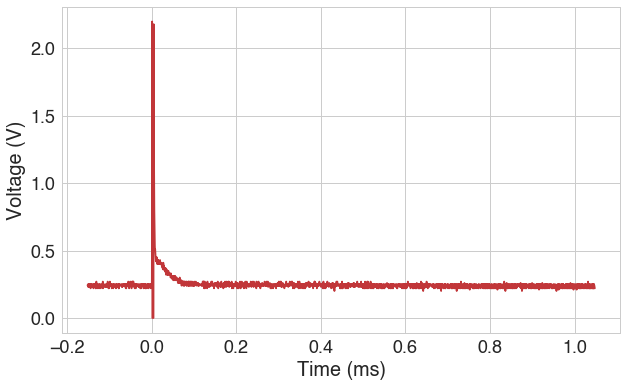

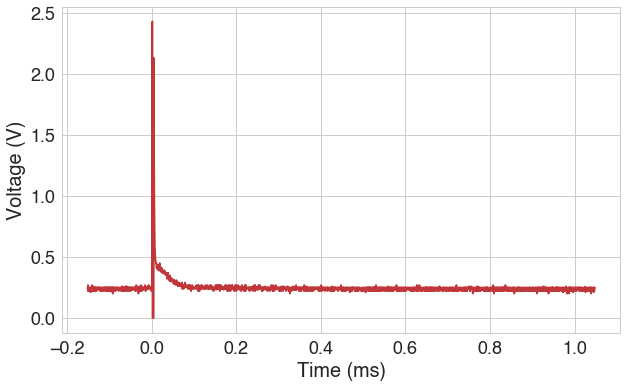

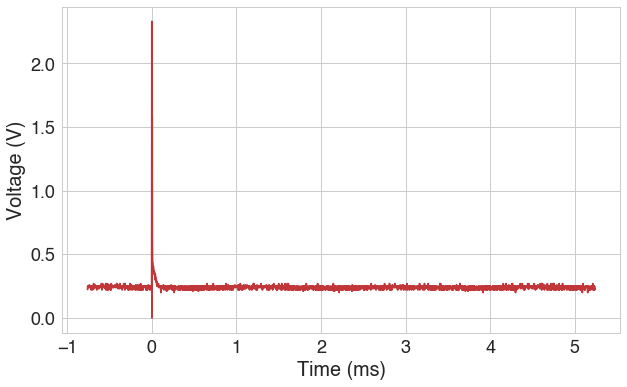

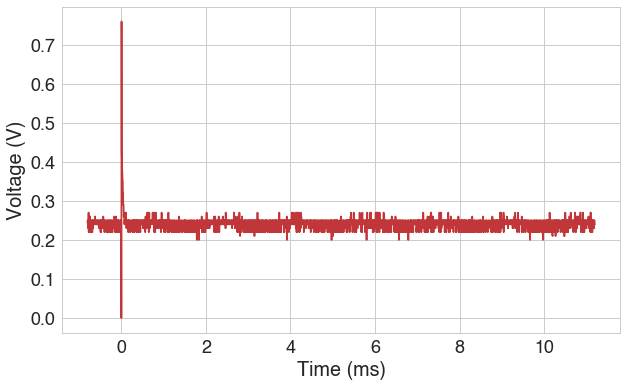

In [533]:
filename = "glycerol-t1-1.DAT"
t2_fid = fid(DIR, filename)
plt.plot(1000*t2_fid.data[:,0], t2_fid.data[:,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/glycerol-t1-1.png")
plt.show()

filename = "glycerol-t1-2.DAT"
t2_fid = fid(DIR, filename)
plt.plot(1000*t2_fid.data[:,0], t2_fid.data[:,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/glycerol-t1-2.png")
plt.show()

filename = "glycerol-t1-3.DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/glycerol-t1-3.png")
plt.show()

filename = "glycerol-t1-4.DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/glycerol-t1-4.png")
plt.show()

file = "glycerol-t1-5"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-6"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-7"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-8"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-9"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-10"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-11"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

file = "glycerol-t1-12"
filename = file + ".DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.savefig("week3/"+file+".png")
plt.show()

In [534]:
t = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0]
v = [-1.92, -1.87, -1.78, -1.73, -1.64, -1.52, -1.07]

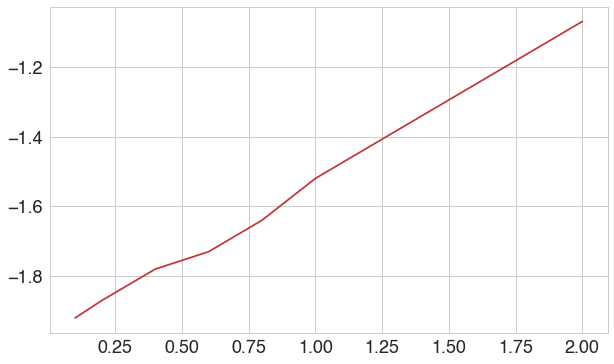

In [535]:
plt.plot(t, v)
plt.show()

50.1846971082


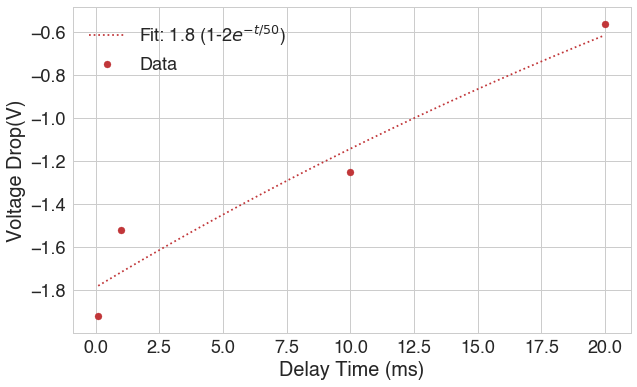

In [537]:

t = [0.1, 1, 10, 20]
x = [-1.92, -1.52, -1.25, -0.56]
#x = [-1.97, -1.57, -1.20, -0.56]
fit = sp.optimize.curve_fit(lambda t,a,b: a*(1-2*np.exp(b*t)), t, x)
print(-1/fit[0][1])

plt.scatter(t, x, label="Data")
ar = np.array([0.1*i for i in range(1, 200)])
plt.plot(ar, fit[0][0]*(1-2*np.exp(fit[0][1]*ar)),  label="Fit: %.1f (1-2$e^{-t/%.f}$)" %(fit[0][0], -1/fit[0][1]),linestyle=":")
plt.legend()
plt.xlabel("Delay Time (ms)")
plt.ylabel("Voltage Drop(V)")
plt.savefig("week3/t1-fit.png")